In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [4]:
# Load data
df = pd.read_csv('AAPL.csv')
df = df[['close']]

In [5]:
# Normalize Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
# Create time-series dataset
def create_dataset(data, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_dataset(scaled_data, time_steps)

In [7]:
# Train-test split (86:14)
train_size = int(len(X) * 0.86)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# GRU Model
model = Sequential()
model.add(GRU(64, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


d:\VI Semester\Stock Market Prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0668 - val_loss: 0.0841
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2051e-04 - val_loss: 0.0021
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2985e-04 - val_loss: 0.0015
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8307e-04 - val_loss: 0.0016
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7433e-04 - val_loss: 0.0014
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8719e-04 - val_loss: 0.0013
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5412e-04 - val_loss: 0.0013
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9916e-04 - val_loss: 0.0013
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [10]:
# Evaluate model
predicted = model.predict(X_test)
from sklearn.metrics import r2_score
print("GRU R² Score:", r2_score(y_test, predicted))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
GRU R² Score: 0.9200363219455004


In [13]:
# Predict next 30 days
last_sequence = X[-1]
future_preds = []
for _ in range(30):
    next_pred = model.predict(last_sequence.reshape(1, time_steps, 1))[0]
    future_preds.append(next_pred)

      # Slide window
    last_sequence = np.append(last_sequence[1:], [next_pred], axis=0)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [14]:
# Inverse transform predictions
future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

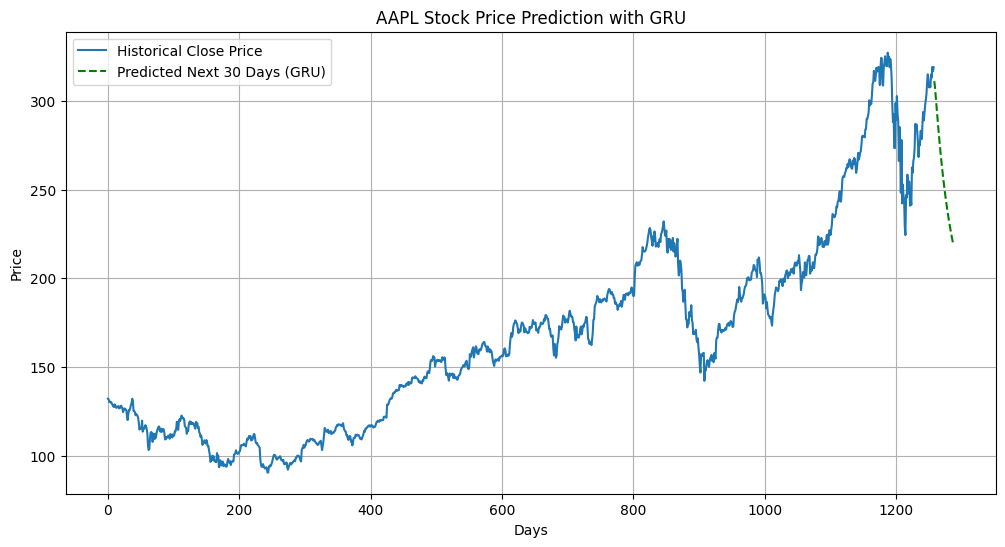

In [16]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['close'].values, label='Historical Close Price')
future_idx = np.arange(len(df), len(df) + 30)
plt.plot(future_idx, future_prices, label='Predicted Next 30 Days (GRU)', linestyle='--', color='green')
plt.title('AAPL Stock Price Prediction with GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Save the model
model.save('gru_model.h5')

from tensorflow.keras.models import load_model

# Load the saved GRU model
loaded_model = load_model('gru_model.h5')